# Ajuste de Brillo y Contraste de imágenes

#### Ajuste de Brillo:
El brillo de una imagen se refiere a la cantidad de luz general presente en la imagen. Ajustar el brillo implica cambiar la intensidad de cada píxel en la imagen. Si agregamos un valor positivo al valor de cada píxel, aumentaremos su brillo, mientras que si restamos un valor, disminuiremos su brillo.

Por ejemplo, si tenemos un píxel con un valor de 100 (en una escala de 0 a 255), y le sumamos 50 para ajustar el brillo, el nuevo valor del píxel será 150. Si le restamos 50, el nuevo valor sería 50.

#### Ajuste de Contraste:
El contraste de una imagen se refiere a la diferencia de intensidad entre los píxeles de la imagen. Un alto contraste significa que hay una gran diferencia entre los valores de píxel adyacentes, lo que resulta en una imagen más nítida y con más detalles. Por otro lado, un bajo contraste significa que hay menos diferencia entre los valores de píxel, lo que resulta en una imagen más suave y menos detallada.

Para ajustar el contraste, multiplicamos cada valor de píxel por un factor de contraste. Si el factor de contraste es mayor que 1, aumentamos la diferencia entre los valores de píxel adyacentes, lo que aumenta el contraste. Si el factor de contraste es menor que 1, disminuimos la diferencia entre los valores de píxel, lo que disminuye el contraste.

Por ejemplo, si tenemos un píxel con un valor de 100 y multiplicamos por un factor de contraste de 1.5, el nuevo valor del píxel será 150. Si multiplicamos por un factor de contraste de 0.5, el nuevo valor sería 50.

In [19]:
import cv2
import matplotlib.pyplot as plt

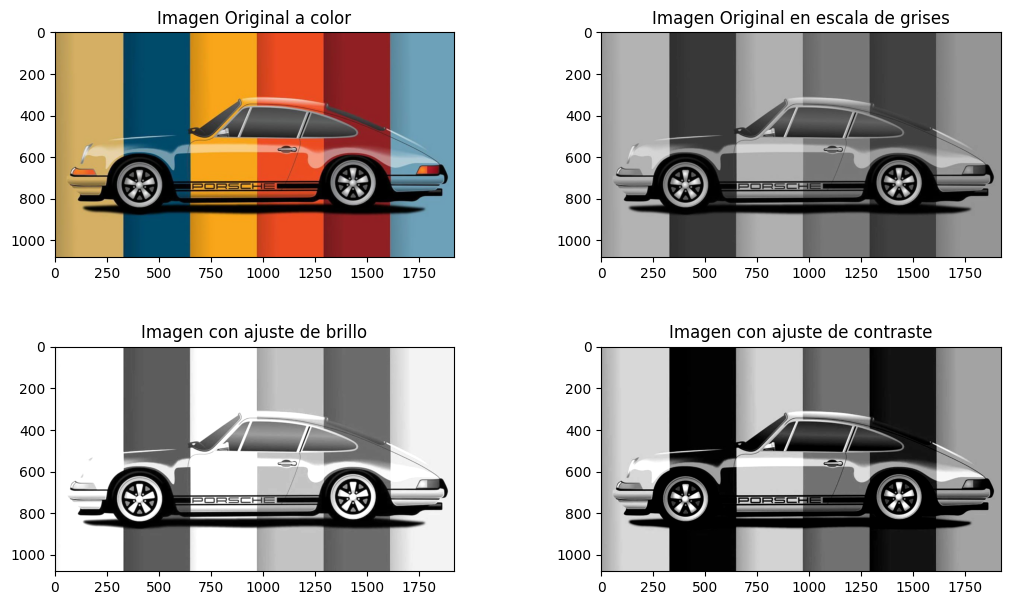

In [20]:
def ajustar_brillo(imagen_gris, brillo):
    # Iterar sobre cada píxel de la imagen
    for i in range(len(imagen_gris)):
        for j in range(len(imagen_gris[0])):
            # Ajustar el brillo sumando el valor deseado
            imagen_gris[i][j] = max(0, min(255, imagen_gris[i][j] + brillo))
    return imagen_gris

def ajustar_contraste(imagen_gris, contraste):
    # Iterar sobre cada píxel de la imagen
    for i in range(len(imagen_gris)):
        for j in range(len(imagen_gris[0])):
            # Ajustar el contraste multiplicando por el factor deseado y sumando 127 porque se está utilizando para desplazar el rango de valores de píxel alrededor del valor medio de 127. Cuando ajustamos el contraste de una imagen multiplicando cada valor de píxel por un factor, el resultado puede causar que algunos valores de píxeles caigan fuera del rango de 0 a 255, lo que puede resultar en una imagen que se vea demasiado oscura o demasiado clara. 
            # Al restar 127 de cada valor de píxel antes de aplicar el ajuste de contraste y luego sumar 127 nuevamente después, estamos centrando el rango de valores de píxel alrededor de 127. Esto ayuda a evitar que los valores de píxel se salgan del rango permitido después de aplicar el ajuste de contraste. 
            # Entonces, el valor 127 se suma para garantizar que los valores de píxel estén dentro del rango válido (0-255) después de aplicar el ajuste de contraste.
            imagen_gris[i][j] = max(0, min(255, (imagen_gris[i][j] - 127) * contraste + 127))
    return imagen_gris

# Cargar la imagen en color
imagen_color = cv2.imread('./image3.jpg')

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)

# Ajustar brillo y contraste
brillo = 100 # el rango efectivo para el ajuste del brillo será desde -255 hasta 255
contraste = 1.75 # el rango efectivo para el ajuste del contraste será desde 0 hasta infinito, pero en la práctica, suele limitarse a valores entre 0 y 2

# Aplicar ajuste de brillo
imagen_ajustada_brillo = ajustar_brillo(imagen_gris.copy(), brillo)

# Aplicar ajuste de contraste
imagen_ajustada_contraste = ajustar_contraste(imagen_gris.copy(), contraste)

# ******************************************************************************************************************************
# # Mostrar la imagen original y la imagen ajustada en ventanas aparte
# cv2.imshow('Imagen Original', imagen_color)
# cv2.imshow('Imagen Ajustada', imagen_ajustada_contraste)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# ******************************************************************************************************************************

# mostrar la imágen ajustada con el brillo y el contraste distribuidas horizontalmente
plt.figure(figsize=(14, 7))

# mostrar la imagen original a colores
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original a color')

# mostrar la imagen original en escala de grises
plt.subplot(2, 2, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original en escala de grises')

# mostrar la imagen ajustada con el brillo
plt.subplot(2, 2, 3)
plt.imshow(imagen_ajustada_brillo, cmap='gray')
plt.title('Imagen con ajuste de brillo')

# mostrar la imagen ajustada con el contraste
plt.subplot(2, 2, 4)
plt.imshow(imagen_ajustada_contraste, cmap='gray')
plt.title('Imagen con ajuste de contraste')

# Ajustar y mostrar el gráfico
plt.subplots_adjust(hspace=0.4, wspace=0.015)
plt.show()
